# ANÁLISE DO EFEITO DA VACINAÇÃO NO BRASIL E NO ESTADO DE SP



## Fonte de Dados:
### site: https://opendatasus.saude.gov.br/dataset/bd-srag-2021

## Processo:

<ol>
    <li> Importar dataframe evidenciando idosos, óbitos e casos diagnosticados como COVID 19 </li>
    <li> Traçar gráficos:</li>
No Brasil: 
    <ul> 
        <li>notificações x semana (separados por covid), </li> 
        <li> covid x semana (separados por idosos),</li>
        <li> óbitos de covid x semana (separados por idosos)</li>
        <li> I dososx semana (separados por óbitos)</li> 
    </ul>
        
Em São Paulo:
    <ul>
        <li> notificações x semana (separados por covid), </li>
        <li> covid x semana (separados por idosos),</li>
        <li> óbitos de covid x semana (separados por idosos)</li>
        <li> Idosos x semana (separados por óbitos)</li>
    </ul>
<li> Análise de proporção </li>
<li> Análises antigas mantidas durante o processo (desconsiderar)</li>
</ol>

## Importar Dataframes e Bibliotecas

In [1]:
#Importar bibliotecas
import pandas as pn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set_theme(style="darkgrid")

In [2]:
#Definido como idoso pessoas acima de 'idade' para fins desse estudo
idade = 90 #dia 9 de março começou a vacinação de pessoas com 77 anos
estado = 'SP'
#Mapa da vacinação
#https://especiais.g1.globo.com/bemestar/vacina/2021/mapa-brasil-vacina-covid/

In [3]:
#importa dataframe
df = pn.read_csv('INFLUD21-29-03-2021.csv', sep=';', usecols=[0, 1, 4, 5,11, 12, 13,53, 107,110]) #53,76,
df['IDOSO'] =  df['NU_IDADE_N'] >= idade
df['OBITO'] = df['EVOLUCAO'] == 2
df['COVID19'] = df['CLASSI_FIN'] == 5

In [4]:
#mostra cabeça do dataframe
df.tail(5)

,DT_NOTIFIC,SEM_NOT,SG_UF_NOT,ID_REGIONA,CS_SEXO,DT_NASC,NU_IDADE_N,OBESIDADE,CLASSI_FIN,EVOLUCAO,IDOSO,OBITO,COVID19
421363,21/03/2021,12,RJ,NaN,F,03/02/1979,42,NaN,NaN,NaN,False,False,False
421364,13/03/2021,10,RJ,NaN,M,25/04/1980,40,NaN,5.0,9.0,False,False,True
421365,28/03/2021,13,SE,REGIONAL ESTANCIA,M,22/01/1948,73,NaN,NaN,NaN,False,False,False
421366,13/02/2021,6,PE,001,M,06/09/1936,84,2.0,NaN,NaN,False,False,False
421367,28/03/2021,13,SP,GVE XXIX SAO JOSE DO RIO PRETO,F,12/08/1964,56,NaN,NaN,NaN,False,False,False


In [5]:
#Média das idades dos pacientes
df['NU_IDADE_N'].mean()

56.654145544986804

In [6]:
#Numero de registros (casos notificados)
df.count()
#df.nunique()

DT_NOTIFIC    421368
SEM_NOT       421368
SG_UF_NOT     421368
ID_REGIONA    384108
CS_SEXO       421368
DT_NASC       420997
NU_IDADE_N    421368
OBESIDADE     159129
CLASSI_FIN    331727
EVOLUCAO      254950
IDOSO         421368
OBITO         421368
COVID19       421368
dtype: int64

In [7]:
#Verificar os tipos dos dados importados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421368 entries, 0 to 421367
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   DT_NOTIFIC  421368 non-null  object 
 1   SEM_NOT     421368 non-null  int64  
 2   SG_UF_NOT   421368 non-null  object 
 3   ID_REGIONA  384108 non-null  object 
 4   CS_SEXO     421368 non-null  object 
 5   DT_NASC     420997 non-null  object 
 6   NU_IDADE_N  421368 non-null  int64  
 7   OBESIDADE   159129 non-null  float64
 8   CLASSI_FIN  331727 non-null  float64
 9   EVOLUCAO    254950 non-null  float64
 10  IDOSO       421368 non-null  bool   
 11  OBITO       421368 non-null  bool   
 12  COVID19     421368 non-null  bool   
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 33.4+ MB


## Evidenciar COVID, OBITO E IDOSOS no data frame Brasil

In [8]:
df_covidbr = df[df['COVID19']==True]
df_ob_covidbr = df_covidbr[df_covidbr['OBITO']==True]
df_idosos_covidbr = df_covidbr[df_covidbr['IDOSO']==True]

# GRÁFICOS BRASIL

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

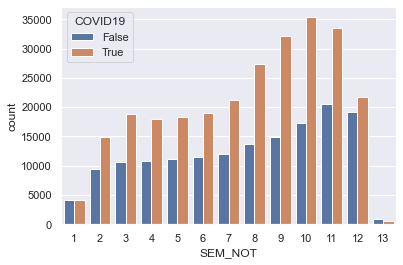

In [9]:
###        notificações x semana (separados por idosos), 
sns.countplot(data=df, x = 'SEM_NOT', hue = 'COVID19')

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

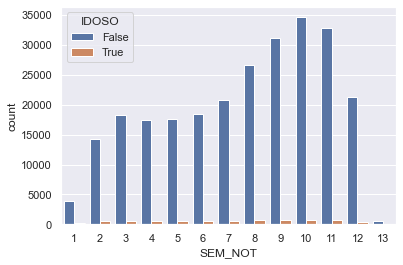

In [10]:
###        covid x semana (separados por idosos),
sns.countplot(data=df_covidbr, x = 'SEM_NOT', hue = 'IDOSO')

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

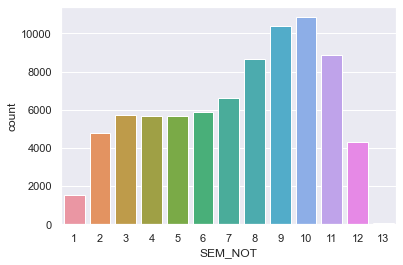

In [11]:
###        óbitos de covid x semana (separados por idosos)
sns.countplot(data=df_ob_covidbr, x = 'SEM_NOT')

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

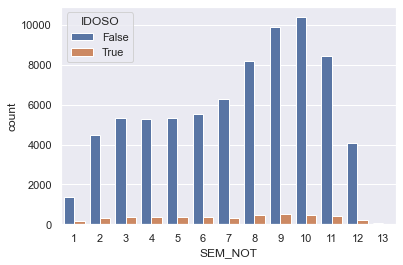

In [12]:
###        óbitos de covid x semana (separados por idosos)
sns.countplot(data=df_ob_covidbr, x = 'SEM_NOT', hue = 'IDOSO')

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

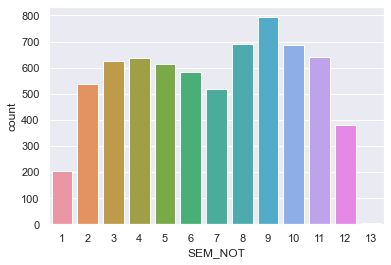

In [13]:
###        Idosos Notificados x semana 
sns.countplot(data=df_idosos_covidbr, x = 'SEM_NOT')

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

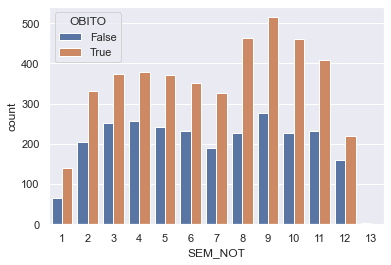

In [14]:
###        Idososx semana (separados por óbitos)
sns.countplot(data=df_idosos_covidbr, x = 'SEM_NOT', hue = 'OBITO')

## Separar Dataframe Estadual (por exemplo: São Paulo)

In [15]:
### ESTADO DE SÃO PAULO
df_sp = df[df['SG_UF_NOT']==estado]
df_covidsp = df_covidbr[df_covidbr['SG_UF_NOT']==estado]
df_ob_covidsp = df_covidbr[df_covidbr['SG_UF_NOT']==estado]
df_idosos_covidsp = df_covidbr[df_covidbr['SG_UF_NOT']==estado]

In [16]:
df_sp.count()

DT_NOTIFIC    126689
SEM_NOT       126689
SG_UF_NOT     126689
ID_REGIONA    126689
CS_SEXO       126689
DT_NASC       126517
NU_IDADE_N    126689
OBESIDADE      47534
CLASSI_FIN    101551
EVOLUCAO       76134
IDOSO         126689
OBITO         126689
COVID19       126689
dtype: int64

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

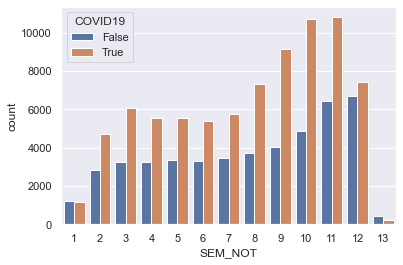

In [17]:
###        notificações x semana (separados por idosos), 
sns.countplot(data=df_sp, x = 'SEM_NOT', hue = 'COVID19')

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

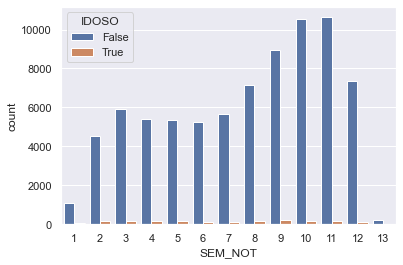

In [18]:
###        covid x semana (separados por idosos),
sns.countplot(data=df_covidsp, x = 'SEM_NOT', hue = 'IDOSO')

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

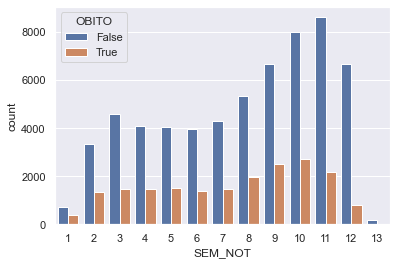

In [19]:
###        Idosos x semana (separados por óbitos)
sns.countplot(data=df_idosos_covidsp, x = 'SEM_NOT', hue = 'OBITO')

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

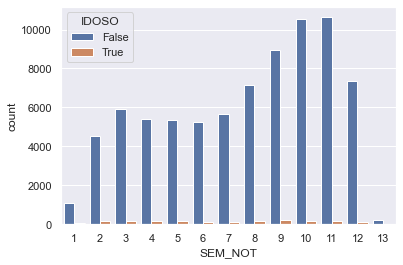

In [20]:
###        Óbitos x semana (separados por idosos)
sns.countplot(data=df_idosos_covidsp, x = 'SEM_NOT', hue = 'IDOSO')

# Outras análises ( a fazer )


# Análises antigas mantidas durante o processo (desconsiderar)

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

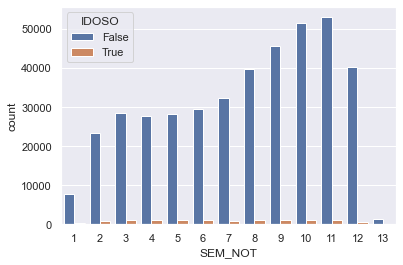

In [21]:
#Gráfico de casos de doenças respiratórias por semana de notificação
#todas as doenças
#todos os estados
#df['SEM_NOT'].value_counts(sort = False).plot.bar()
sns.countplot(data=df, x = 'SEM_NOT', hue = 'IDOSO')

In [22]:
# Casos diagnosticados como COVID 19 (=5)
# CLASS_FINAL
# 1-SRAG por i nfluenza
# 2-SRAG por outro vírus re s piratório
# 3-SRAGpor   outro   a gente e ti ológico, qual:
# 4-SRAG nã o e specificado
# 5-SRAG por COVI D-19 <-----
df['CLASSI_FIN'].value_counts()

5.0    264757
4.0     63757
2.0      2110
3.0       738
1.0       365
Name: CLASSI_FIN, dtype: int64

In [23]:
#Subset Covid
df_c19 = df[df['CLASSI_FIN']==5]

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

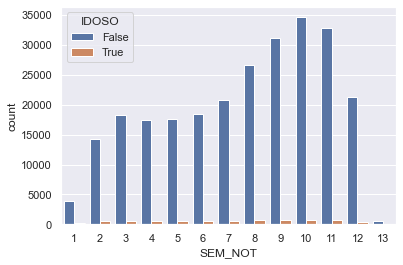

In [24]:
#Gráfico de casos de COVID 19 por semana de notificação
# É possível verificar o aumento no mês de março
#df_c19['SEM_NOT'].value_counts(sort = False).plot.bar()
#Apenas Covid19
#Todos os estados
sns.countplot(data=df_c19, x = 'SEM_NOT', hue = 'IDOSO')

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

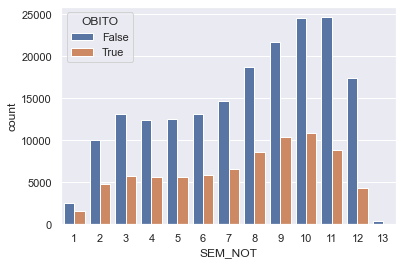

In [25]:
#Gráfico de casos de COVID 19 por semana de notificação
# É possível verificar o aumento no mês de março
#df_c19['SEM_NOT'].value_counts(sort = False).plot.bar()
#Apenas Covid19
#Todos os estados
sns.countplot(data=df_c19, x = 'SEM_NOT', hue = 'OBITO')

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

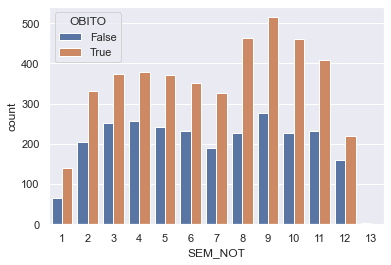

In [26]:
#Gráfico de casos de COVID 19 por semana de notificação
# É possível verificar o aumento no mês de março
#df_c19['SEM_NOT'].value_counts(sort = False).plot.bar()
#Apenas Covid19
#Apenas Idosos
#Todos os estados
sns.countplot(data=df_c19[df_c19['IDOSO']==True], x = 'SEM_NOT', hue = 'OBITO')

In [27]:
# Evolução dos casos de Covid 19
# 1 - Cura
# 2 - Óbito
# 3 - Óbito por outras causas
# 9 - Ignorado
#

df_c19['EVOLUCAO'].value_counts()

1.0    109123
2.0     79029
9.0      8132
3.0       459
Name: EVOLUCAO, dtype: int64

In [28]:
#Sub Dataframe apenas com óbitos por covid 19
df_ob = df_c19[df_c19['EVOLUCAO']==2]
df_ob.head(20)

,DT_NOTIFIC,SEM_NOT,SG_UF_NOT,ID_REGIONA,CS_SEXO,DT_NASC,NU_IDADE_N,OBESIDADE,CLASSI_FIN,EVOLUCAO,IDOSO,OBITO,COVID19
5,11/01/2021,2,SP,GVE VIII MOGI DAS CRUZES,M,07/03/1948,72,2.0,5.0,2.0,False,True,True
14,05/01/2021,1,RJ,NaN,F,24/09/1969,51,NaN,5.0,2.0,False,True,True
25,11/01/2021,2,SP,GVE XVII CAMPINAS,F,20/01/1931,89,2.0,5.0,2.0,False,True,True
39,05/01/2021,1,SP,GVE I CAPITAL,M,19/01/1952,68,2.0,5.0,2.0,False,True,True
50,11/01/2021,2,SC,JOINVILLE,M,11/03/1932,88,NaN,5.0,2.0,False,True,True
57,08/01/2021,1,SP,GVE I CAPITAL,F,15/06/1954,66,NaN,5.0,2.0,False,True,True
64,05/01/2021,1,MG,UBERLANDIA,F,23/09/1971,49,2.0,5.0,2.0,False,True,True
68,09/01/2021,1,RS,006 CRS,M,21/07/1934,86,2.0,5.0,2.0,False,True,True
69,10/01/2021,2,SP,GVE I CAPITAL,F,26/07/1926,94,NaN,5.0,2.0,True,True,True
81,07/01/2021,1,SP,GVE XV BAURU,F,28/05/1952,68,NaN,5.0,2.0,False,True,True


<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

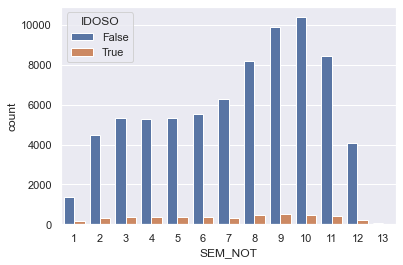

In [29]:
#Gráfico de casos de óbitos por COVID19 por semana de notificação
#df_ob['SEM_NOT'].value_counts(sort = False).plot.bar()
#Apenas Covid19
#Todos os estados
#Apenas os óbitos
sns.countplot(data=df_ob, x = 'SEM_NOT', hue = 'IDOSO')

In [30]:
#informações numéricas sobre óbitos por Covid-19
df_ob.describe()

,SEM_NOT,NU_IDADE_N,OBESIDADE,CLASSI_FIN,EVOLUCAO
count,79029.000000,79029.000000,38324.000000,79029.0,79029.0
mean,7.368384,67.368434,1.955772,5.0,2.0
std,3.050171,15.588855,1.179415,0.0,0.0
min,1.000000,0.000000,1.000000,5.0,2.0
25%,5.000000,58.000000,2.000000,5.0,2.0
50%,8.000000,69.000000,2.000000,5.0,2.0
75%,10.000000,79.000000,2.000000,5.0,2.0
max,13.000000,128.000000,9.000000,5.0,2.0


In [31]:
#informações numéricas sobre  óbitos de pessoas com mais de IDADE anos
df_ob[df_ob['NU_IDADE_N']>=idade].describe()


,SEM_NOT,NU_IDADE_N,OBESIDADE,CLASSI_FIN,EVOLUCAO
count,4341.000000,4341.000000,2073.00000,4341.0,4341.0
mean,6.859710,93.149965,2.15726,5.0,2.0
std,3.155551,3.234583,1.21102,0.0,0.0
min,1.000000,90.000000,1.00000,5.0,2.0
25%,4.000000,91.000000,2.00000,5.0,2.0
50%,7.000000,92.000000,2.00000,5.0,2.0
75%,10.000000,95.000000,2.00000,5.0,2.0
max,13.000000,128.000000,9.00000,5.0,2.0


In [32]:
#Sub set de maiores de óbitos por covid para maiores de 80 anos
df_idoso = df_ob[df_ob['NU_IDADE_N']>=idade]
df_idoso.tail()

,DT_NOTIFIC,SEM_NOT,SG_UF_NOT,ID_REGIONA,CS_SEXO,DT_NASC,NU_IDADE_N,OBESIDADE,CLASSI_FIN,EVOLUCAO,IDOSO,OBITO,COVID19
420960,01/03/2021,9,SP,GVE I CAPITAL,F,22/10/1924,96,2.0,5.0,2.0,True,True,True
421061,13/03/2021,10,CE,1 CRES FORTALEZA,F,09/10/1929,91,2.0,5.0,2.0,True,True,True
421210,17/03/2021,11,RS,002 CRS,M,03/07/1927,93,2.0,5.0,2.0,True,True,True
421245,09/03/2021,10,CE,22 CRES CASCAVEL,M,24/08/1927,93,2.0,5.0,2.0,True,True,True
421275,14/03/2021,11,CE,10 CRES LIMOEIRO DO NORTE,F,21/12/1926,94,2.0,5.0,2.0,True,True,True


In [33]:
idade

90

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

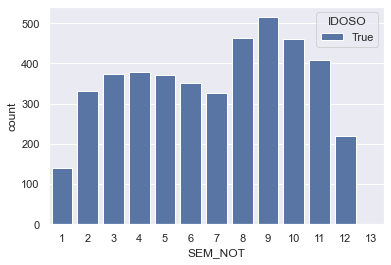

In [34]:
#Gráfico de casos de óbitos de idosos por COVID19 por semana de notificação
#df_idoso['SEM_NOT'].value_counts(sort = False).plot.bar()
sns.countplot(data=df_idoso, x = 'SEM_NOT', hue = 'IDOSO')

In [35]:
df_estado=df_idoso[df_idoso['SG_UF_NOT']== estado]

In [36]:
df_estado.head()

,DT_NOTIFIC,SEM_NOT,SG_UF_NOT,ID_REGIONA,CS_SEXO,DT_NASC,NU_IDADE_N,OBESIDADE,CLASSI_FIN,EVOLUCAO,IDOSO,OBITO,COVID19
69,10/01/2021,2,SP,GVE I CAPITAL,F,26/07/1926,94,NaN,5.0,2.0,True,True,True
151,14/01/2021,2,SP,GVE XV BAURU,F,07/12/1930,90,2.0,5.0,2.0,True,True,True
351,19/01/2021,3,SP,GVE XII ARARAQUARA,F,27/09/1930,90,2.0,5.0,2.0,True,True,True
513,15/01/2021,2,SP,GVE I CAPITAL,F,16/09/1925,95,NaN,5.0,2.0,True,True,True
774,28/01/2021,4,SP,GVE I CAPITAL,F,22/11/1925,95,NaN,5.0,2.0,True,True,True


In [37]:
df_estado.sample()

,DT_NOTIFIC,SEM_NOT,SG_UF_NOT,ID_REGIONA,CS_SEXO,DT_NASC,NU_IDADE_N,OBESIDADE,CLASSI_FIN,EVOLUCAO,IDOSO,OBITO,COVID19
151774,15/03/2021,11,SP,GVE XVII CAMPINAS,M,14/12/1929,91,NaN,5.0,2.0,True,True,True


In [38]:
df_estado.tail()

,DT_NOTIFIC,SEM_NOT,SG_UF_NOT,ID_REGIONA,CS_SEXO,DT_NASC,NU_IDADE_N,OBESIDADE,CLASSI_FIN,EVOLUCAO,IDOSO,OBITO,COVID19
418937,08/03/2021,10,SP,GVE XV BAURU,M,14/03/1930,90,2.0,5.0,2.0,True,True,True
419808,17/03/2021,11,SP,GVE XXXI SOROCABA,F,15/06/1930,90,2.0,5.0,2.0,True,True,True
419864,19/03/2021,11,SP,GVE XXX JALES,F,05/11/1929,91,2.0,5.0,2.0,True,True,True
420300,19/02/2021,7,SP,GVE VII SANTO ANDRE,M,19/09/1930,90,2.0,5.0,2.0,True,True,True
420960,01/03/2021,9,SP,GVE I CAPITAL,F,22/10/1924,96,2.0,5.0,2.0,True,True,True


In [39]:
#

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

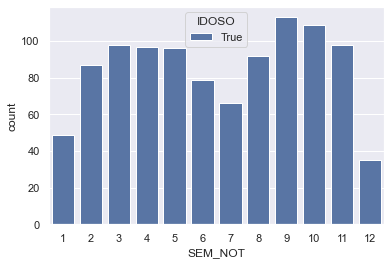

In [40]:
#Gráfico com Seaborn - Óbitos Covid19 em SP
sns.countplot(data=df_estado, x = 'SEM_NOT', hue = 'IDOSO')

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

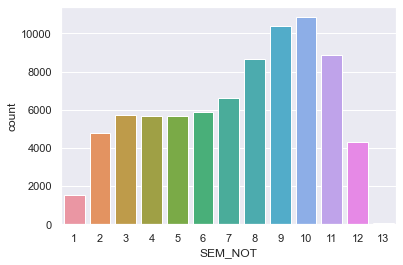

In [41]:
#Gráfico com Seaborn - Óbitos todas as idades em Brasil
sns.countplot(data=df_ob, x = 'SEM_NOT')